In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clothes = pd.read_csv("Dresses.csv", na_values='null')

In [3]:
clothes.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [4]:
print(len(clothes))

500


In [5]:
clothes.dtypes

Dress_ID            int64
Style              object
Price              object
Rating            float64
Size               object
Season             object
NeckLine           object
SleeveLength       object
waiseline          object
Material           object
FabricType         object
Decoration         object
Pattern Type       object
Recommendation      int64
dtype: object

In [6]:
print(clothes.columns)

for entry in clothes.iloc[1,:]:
    print(entry)
    print(type(entry))

Index(['Dress_ID', 'Style', 'Price', 'Rating', 'Size', 'Season', 'NeckLine',
       'SleeveLength', 'waiseline', 'Material', 'FabricType', 'Decoration',
       'Pattern Type', 'Recommendation'],
      dtype='object')
1212192089
<class 'numpy.int64'>
Casual
<class 'str'>
Low
<class 'str'>
0.0
<class 'numpy.float64'>
L
<class 'str'>
Summer
<class 'str'>
o-neck
<class 'str'>
Petal
<class 'str'>
natural
<class 'str'>
microfiber
<class 'str'>
nan
<class 'float'>
ruffles
<class 'str'>
animal
<class 'str'>
0
<class 'numpy.int64'>


In [7]:
# recommendation is based on sales

In [8]:
clothes = clothes.rename(columns={'waiseline': 'Waistline', 'Pattern Type': 'PatternType'})


In [9]:
for c in clothes.columns[1:]:
    print("\ncol {}, has {} nulls".format(c, sum(clothes[c].isnull())))
    print("unique values: ", clothes[c].unique())


col Style, has 0 nulls
unique values:  ['Sexy' 'Casual' 'vintage' 'Brief' 'cute' 'bohemian' 'Novelty' 'Flare'
 'party' 'sexy' 'work' 'OL' 'fashion']

col Price, has 2 nulls
unique values:  ['Low' 'High' 'Average' 'Medium' 'very-high' 'low' 'high' nan]

col Rating, has 0 nulls
unique values:  [4.6 0.  4.5 5.  4.7 4.8 4.3 4.  4.4 4.9 4.2 3.6 3.7 4.1 3.5 1.  3. ]

col Size, has 0 nulls
unique values:  ['M' 'L' 'XL' 'free' 'S' 'small' 's']

col Season, has 2 nulls
unique values:  ['Summer' 'Automn' 'Spring' 'Winter' 'spring' 'winter' nan 'summer'
 'Autumn']

col NeckLine, has 3 nulls
unique values:  ['o-neck' 'v-neck' 'boat-neck' 'peterpan-collor' 'ruffled'
 'turndowncollor' 'slash-neck' 'mandarin-collor' 'open' 'sqare-collor'
 'Sweetheart' 'sweetheart' nan 'Scoop' 'halter' 'backless' 'bowneck']

col SleeveLength, has 2 nulls
unique values:  ['sleevless' 'Petal' 'full' 'butterfly' 'short' 'threequarter'
 'halfsleeve' 'cap-sleeves' 'turndowncollor' 'threequater' 'capsleeves'
 'sleeveless' 

In [10]:
clothes.replace({"Price" : {"low":"Low", "high":"High", "Average":"Medium"} }, inplace=True)

clothes.replace({"Size" : {"s":"S", "small":"S"} }, inplace=True)

clothes.replace({"Season" : {"spring":"Spring", "summer":"Summer", 
                                 "Automn":"Autumn", "winter":"Winter"} }, inplace=True)

clothes.replace({"Neckline" : {"Sweetheart":"sweetheart"} }, inplace=True)

clothes.replace({"SleeveLength" : {"halfsleeve":"half", "threequater":"threequarter", 
                                 "thressqatar":"threequarter", "sleveless":"sleeveless", 
                                "sleeevless":"sleeveless", "sleevless":"sleeveless"} }, inplace=True)

clothes.replace({"Material" : {"shiffon":"chiffon", "chiffonfabric":"chiffon",
                               "sill":"silk"} }, inplace=True)

clothes.replace({"FabricType" : {"shiffon":"chiffon", "flannael":"flannel",
                               "knitting":"knitted", "wollen":"woolen",
                                "Corduroy":"corduroy"} }, inplace=True)

clothes.replace({"Decoration" : {"none":"plain"} }, inplace=True)

clothes.replace({"PatternType" : {"leapord":"leopard"} }, inplace=True)

## Nan Values

In [11]:
clothes[clothes.isna().any(axis=1)] # 401 rows!

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Waistline,Material,FabricType,Decoration,PatternType,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleeveless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Autumn,o-neck,full,natural,polyster,NaN,NaN,print,0
5,1068332458,bohemian,Low,0.0,M,Summer,v-neck,sleeveless,empire,NaN,NaN,NaN,print,0
6,1220707172,Casual,Medium,0.0,XL,Summer,o-neck,full,NaN,cotton,NaN,NaN,solid,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,859922576,cute,Medium,4.6,M,Spring,o-neck,half,natural,acrylic,chiffon,NaN,NaN,0
494,990559192,Brief,Medium,4.7,M,Winter,o-neck,half,natural,acrylic,chiffon,NaN,striped,0
495,713391965,Casual,Low,4.7,M,Spring,o-neck,full,natural,polyster,NaN,NaN,solid,1
496,722565148,Sexy,Low,4.3,free,Summer,o-neck,full,empire,cotton,NaN,NaN,NaN,0


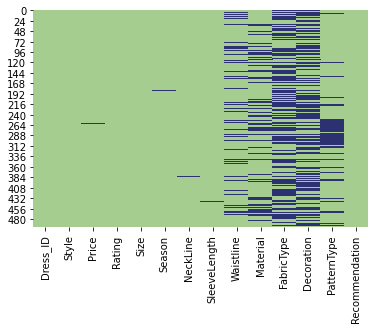

In [12]:
sns.heatmap(clothes.isna(), cbar=False, cmap='crest')
plt.show()

### Price

In [13]:
clothes[clothes['Price'].isnull()]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Waistline,Material,FabricType,Decoration,PatternType,Recommendation
262,662727740,party,NaN,4.8,free,Winter,o-neck,sleeveless,empire,NaN,NaN,embroidary,NaN,1
263,1090993173,party,NaN,4.5,L,Summer,NaN,full,NaN,NaN,NaN,NaN,NaN,1


In [14]:
clothes['Price'].value_counts()

Medium       282
Low          174
very-high     21
High          21
Name: Price, dtype: int64

In [15]:
# replace NaNs with Medium
clothes["Price"].fillna("Medium", inplace = True)

In [16]:
# check that change has been made
#clothes.loc[262:264,:]

### Season

In [17]:
clothes[clothes['Season'].isnull()]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Waistline,Material,FabricType,Decoration,PatternType,Recommendation
186,929797706,Casual,Low,0.0,free,NaN,o-neck,full,natural,cotton,NaN,NaN,patchwork,0
270,751364623,party,Medium,4.8,L,NaN,Sweetheart,sleeveless,empire,NaN,NaN,pleat,NaN,1


In [18]:
clothes['Season'].value_counts()

Summer    160
Winter    145
Spring    124
Autumn     69
Name: Season, dtype: int64

Find similar dresses to the ones with null values for Season.

In [19]:
clothes.loc[(clothes['Style']=='Casual') & (clothes['SleeveLength']=='full') & (clothes['NeckLine']=='o-neck') & (clothes['Size']=='free') & (clothes['Material']=='cotton')]['Season'].value_counts()

Summer    5
Spring    1
Autumn    1
Name: Season, dtype: int64

In [20]:
clothes.loc[(clothes['Style']=='party') & (clothes['NeckLine']=='Sweetheart') & (clothes['Waistline']=='empire')]['Season'].value_counts()

Spring    3
Name: Season, dtype: int64

In [21]:
clothes.loc[186, "Season"] = 'Summer'

In [22]:
clothes.loc[186,:]

Dress_ID          929797706
Style                Casual
Price                   Low
Rating                    0
Size                   free
Season               Summer
NeckLine             o-neck
SleeveLength           full
Waistline           natural
Material             cotton
FabricType              NaN
Decoration              NaN
PatternType       patchwork
Recommendation            0
Name: 186, dtype: object

In [23]:
clothes.loc[270, "Season"] = 'Spring'

In [24]:
clothes.loc[270,"Season"]

'Spring'

In [25]:
sum(clothes['Season'].isnull())

0

### Neckline

In [26]:
clothes[clothes['NeckLine'].isnull()]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Waistline,Material,FabricType,Decoration,PatternType,Recommendation
263,1090993173,party,Medium,4.5,L,Summer,NaN,full,NaN,NaN,NaN,NaN,NaN,1
329,858212832,cute,Medium,4.3,M,Summer,NaN,NaN,natural,cotton,chiffon,NaN,solid,0
384,855418066,Casual,Low,4.7,L,Summer,NaN,sleeveless,NaN,cotton,NaN,NaN,solid,1


In [27]:
clothes['NeckLine'].value_counts()
# 3 summer dresses ->  o-neck     definitely could be wrong

o-neck             271
v-neck             124
slash-neck          25
boat-neck           19
Sweetheart          14
turndowncollor      13
bowneck             10
peterpan-collor      6
sqare-collor         5
open                 3
Scoop                2
ruffled              1
backless             1
halter               1
sweetheart           1
mandarin-collor      1
Name: NeckLine, dtype: int64

In [28]:
clothes.loc[(clothes['Style']=='party') & (clothes['Season']=='Summer')]['NeckLine'].value_counts()

o-neck        4
Sweetheart    1
slash-neck    1
v-neck        1
Name: NeckLine, dtype: int64

In [29]:
clothes.loc[(clothes['Style']=='cute') & (clothes['Season']=='Summer')]['NeckLine'].value_counts()

o-neck             10
boat-neck           3
peterpan-collor     1
bowneck             1
Name: NeckLine, dtype: int64

In [30]:
clothes.loc[(clothes['Style']=='Casual') & (clothes['Season']=='Summer')]['NeckLine'].value_counts()
# o - neck for all 3

o-neck             49
v-neck             15
boat-neck           3
turndowncollor      2
bowneck             2
backless            1
slash-neck          1
peterpan-collor     1
Sweetheart          1
Name: NeckLine, dtype: int64

An o-neck is the most common neckline in this dresses dataset. After looking at similar dresses to the 3 rows with a null value, o-neck is still most popular.

In [31]:
clothes["NeckLine"].fillna("o-neck", inplace = True)

### Sleeve Length

In [32]:
clothes[clothes['SleeveLength'].isnull()]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Waistline,Material,FabricType,Decoration,PatternType,Recommendation
329,858212832,cute,Medium,4.3,M,Summer,o-neck,NaN,natural,cotton,chiffon,NaN,solid,0
441,1055149353,Sexy,Low,0.0,free,Winter,v-neck,NaN,dropped,cotton,NaN,lace,NaN,1


In [33]:
clothes['SleeveLength'].value_counts()

sleeveless        232
full               97
short              96
half               36
threequarter       28
capsleeves          3
cap-sleeves         2
urndowncollor       1
turndowncollor      1
butterfly           1
Petal               1
Name: SleeveLength, dtype: int64

Most dresses are sleeveless, but since there are only 2 with null values for SleeveLength, I want to find similar dresses before deciding. After picking a few determinant attributes, I found that most of these dresses are also sleeveless. 

In [34]:
clothes.loc[(clothes['Style']=='cute') & (clothes['Season']=='Summer')]['SleeveLength'].value_counts()  # sleeveless is top
# sleeveless


sleeveless    9
short         5
butterfly     1
Name: SleeveLength, dtype: int64

In [35]:
clothes.loc[(clothes['Style']=='Sexy') & (clothes['Season']=='Winter') & (clothes['NeckLine']=='v-neck')]['SleeveLength'].value_counts() # sleeveless is More top
# sleeveless

sleeveless    8
Name: SleeveLength, dtype: int64

In [36]:
clothes["SleeveLength"].fillna("sleeveless", inplace = True)

### Waistline

In [37]:
clothes[clothes['Waistline'].isnull()]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Waistline,Material,FabricType,Decoration,PatternType,Recommendation
6,1220707172,Casual,Medium,0.0,XL,Summer,o-neck,full,NaN,cotton,NaN,NaN,solid,0
11,898481530,Flare,Medium,0.0,free,Spring,v-neck,short,NaN,nylon,NaN,NaN,animal,0
12,957723897,sexy,Low,4.7,M,Winter,o-neck,threequarter,NaN,NaN,chiffon,lace,print,1
14,1055411544,Casual,Low,5.0,M,Summer,boat-neck,short,NaN,cotton,NaN,sashes,solid,0
15,1162628131,Casual,Low,0.0,free,Winter,boat-neck,full,NaN,other,other,lace,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,1253973206,cute,Low,0.0,M,Summer,boat-neck,short,NaN,NaN,chiffon,sashes,NaN,0
465,828790972,party,Medium,4.9,M,Winter,o-neck,half,NaN,cotton,NaN,lace,NaN,1
466,933413410,Casual,Medium,4.8,M,Summer,o-neck,half,NaN,NaN,NaN,NaN,NaN,0
470,1124754999,Sexy,Medium,0.0,S,Summer,v-neck,sleeveless,NaN,NaN,NaN,NaN,NaN,1


In [38]:
clothes['Waistline'].value_counts()
# nulls -> natural

natural     304
empire      104
dropped       4
princess      1
Name: Waistline, dtype: int64

More than half of the dresses have a natural waistline, so I will fill the nulls with this most common waistline type.

- no waist - 

In [39]:
clothes["Waistline"].fillna("natural", inplace = True)

### Material

In [40]:
clothes[clothes['Material'].isnull()]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Waistline,Material,FabricType,Decoration,PatternType,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleeveless,empire,NaN,chiffon,ruffles,animal,1
5,1068332458,bohemian,Low,0.0,M,Summer,v-neck,sleeveless,empire,NaN,NaN,NaN,print,0
12,957723897,sexy,Low,4.7,M,Winter,o-neck,threequarter,natural,NaN,chiffon,lace,print,1
17,830467746,bohemian,Medium,5.0,free,Autumn,o-neck,full,natural,NaN,NaN,hollowout,patchwork,1
21,856178100,Casual,Low,4.3,M,Summer,o-neck,sleeveless,natural,NaN,chiffon,NaN,solid,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,933413410,Casual,Medium,4.8,M,Summer,o-neck,half,natural,NaN,NaN,NaN,NaN,0
470,1124754999,Sexy,Medium,0.0,S,Summer,v-neck,sleeveless,natural,NaN,NaN,NaN,NaN,1
471,832949213,Casual,Low,4.4,free,Summer,o-neck,sleeveless,natural,NaN,NaN,NaN,animal,0
473,929898500,work,Medium,4.8,M,Winter,turndowncollor,full,natural,NaN,NaN,NaN,solid,0


In [41]:
clothes['Material'].value_counts()
# cotton
#  or other

cotton        152
polyster       99
silk           27
chiffon        27
mix            12
nylon          10
rayon          10
milksilk        5
spandex         5
cashmere        4
acrylic         3
linen           3
lycra           3
microfiber      3
other           2
viscos          2
model           1
knitting        1
modal           1
lace            1
wool            1
Name: Material, dtype: int64

In [42]:
clothes["Material"].fillna("cotton", inplace = True)


### Fabric Type

In [43]:
clothes[clothes['FabricType'].isnull()]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Waistline,Material,FabricType,Decoration,PatternType,Recommendation
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Autumn,o-neck,full,natural,polyster,NaN,NaN,print,0
5,1068332458,bohemian,Low,0.0,M,Summer,v-neck,sleeveless,empire,cotton,NaN,NaN,print,0
6,1220707172,Casual,Medium,0.0,XL,Summer,o-neck,full,natural,cotton,NaN,NaN,solid,0
11,898481530,Flare,Medium,0.0,free,Spring,v-neck,short,natural,nylon,NaN,NaN,animal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,1190558632,cute,Medium,0.0,L,Summer,o-neck,sleeveless,empire,cotton,NaN,lace,solid,1
491,964917582,Casual,Medium,5.0,L,Summer,o-neck,sleeveless,natural,cotton,NaN,NaN,NaN,1
495,713391965,Casual,Low,4.7,M,Spring,o-neck,full,natural,polyster,NaN,NaN,solid,1
496,722565148,Sexy,Low,4.3,free,Summer,o-neck,full,empire,cotton,NaN,NaN,NaN,0


In [44]:
clothes['FabricType'].value_counts()
# other or chiffon (most common)  ?

chiffon       144
broadcloth     31
worsted        19
jersey         12
sattin          6
woolen          3
tulle           2
knitted         2
batik           2
poplin          2
corduroy        2
flannel         2
dobby           2
satin           1
organza         1
other           1
terry           1
lace            1
Name: FabricType, dtype: int64

Between Material and Fabric Type, I only want to keep one of these

keep just 1

Fabric type has more nulls, but chiffon is a clearer winner than cotton in Material.


In [45]:
# do I want to do this ??

clothes["FabricType"].fillna("chiffon", inplace = True)
# CHECK

### Decorations

In [46]:
clothes[clothes['Decoration'].isnull()]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Waistline,Material,FabricType,Decoration,PatternType,Recommendation
2,1190380701,vintage,High,0.0,L,Autumn,o-neck,full,natural,polyster,chiffon,NaN,print,0
5,1068332458,bohemian,Low,0.0,M,Summer,v-neck,sleeveless,empire,cotton,chiffon,NaN,print,0
6,1220707172,Casual,Medium,0.0,XL,Summer,o-neck,full,natural,cotton,chiffon,NaN,solid,0
9,985292672,bohemian,Low,0.0,free,Summer,v-neck,sleeveless,natural,nylon,chiffon,NaN,NaN,1
11,898481530,Flare,Medium,0.0,free,Spring,v-neck,short,natural,nylon,chiffon,NaN,animal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,964917582,Casual,Medium,5.0,L,Summer,o-neck,sleeveless,natural,cotton,chiffon,NaN,NaN,1
492,859922576,cute,Medium,4.6,M,Spring,o-neck,half,natural,acrylic,chiffon,NaN,NaN,0
494,990559192,Brief,Medium,4.7,M,Winter,o-neck,half,natural,acrylic,chiffon,NaN,striped,0
495,713391965,Casual,Low,4.7,M,Spring,o-neck,full,natural,polyster,chiffon,NaN,solid,1


In [47]:
clothes['Decoration'].value_counts()
# put 'plain' for nulls

lace          70
sashes        42
beading       22
applique      21
hollowout     21
ruffles       17
bow           15
sequined      14
button         6
pockets        5
embroidary     5
flowers        4
plain          4
crystal        3
rivet          3
ruched         3
draped         2
feathers       2
Tiered         1
pleat          1
cascading      1
pearls         1
tassel         1
Name: Decoration, dtype: int64

Whoever filled out the entries for dresses either skipped the Decoration column or didn't bother to fill it in because the dress had no decoration. For the purpose of this project, I will assume the dress had no obvious decoration. The null values will be filled with 'none'.

In [48]:
clothes["Decoration"].fillna("none", inplace = True)

### Pattern

In [49]:
clothes[clothes['PatternType'].isnull()]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Waistline,Material,FabricType,Decoration,PatternType,Recommendation
7,1219677488,Novelty,Medium,0.0,free,Autumn,o-neck,short,natural,polyster,broadcloth,lace,NaN,0
9,985292672,bohemian,Low,0.0,free,Summer,v-neck,sleeveless,natural,nylon,chiffon,none,NaN,1
15,1162628131,Casual,Low,0.0,free,Winter,boat-neck,full,natural,other,other,lace,NaN,0
19,1113221101,Sexy,Medium,5.0,M,Autumn,o-neck,sleeveless,empire,milksilk,chiffon,none,NaN,1
79,943188872,bohemian,very-high,4.7,free,Winter,v-neck,sleeveless,natural,polyster,chiffon,none,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,933413410,Casual,Medium,4.8,M,Summer,o-neck,half,natural,cotton,chiffon,none,NaN,0
470,1124754999,Sexy,Medium,0.0,S,Summer,v-neck,sleeveless,natural,cotton,chiffon,none,NaN,1
491,964917582,Casual,Medium,5.0,L,Summer,o-neck,sleeveless,natural,cotton,chiffon,none,NaN,1
492,859922576,cute,Medium,4.6,M,Spring,o-neck,half,natural,acrylic,chiffon,none,NaN,0


In [50]:
clothes['PatternType'].value_counts()
# 'none' and null -> solid

solid        203
print         71
patchwork     48
animal        21
striped       17
dot           14
geometric      5
leopard        4
plaid          3
floral         2
character      1
splice         1
none           1
Name: PatternType, dtype: int64

The Pattern column is a similar situation to Decoration. I have decided to interpret null values as a solid colored dress.

In [51]:
# change the one 'none' to solid
clothes.replace({"PatternType" : {"none":"solid"} }, inplace=True)

# replace NaNs with solid
clothes["PatternType"].fillna("solid", inplace = True)

## Feature Engineering

In [52]:

rating_mean = clothes["Rating"].mean()
rating_std = clothes["Rating"].std()

z_normalization = lambda x: x - rating_mean / rating_std# ddof=0 ?


z = lambda x: x/5.
clothes['Rating'].apply(z)

#clothes['Rating'].apply(z_normalization)  # work without a group by ?

0      0.92
1      0.00
2      0.00
3      0.92
4      0.90
       ... 
495    0.94
496    0.86
497    0.94
498    0.92
499    0.88
Name: Rating, Length: 500, dtype: float64

## Visualizations

Text(0.5, 0, 'Style')

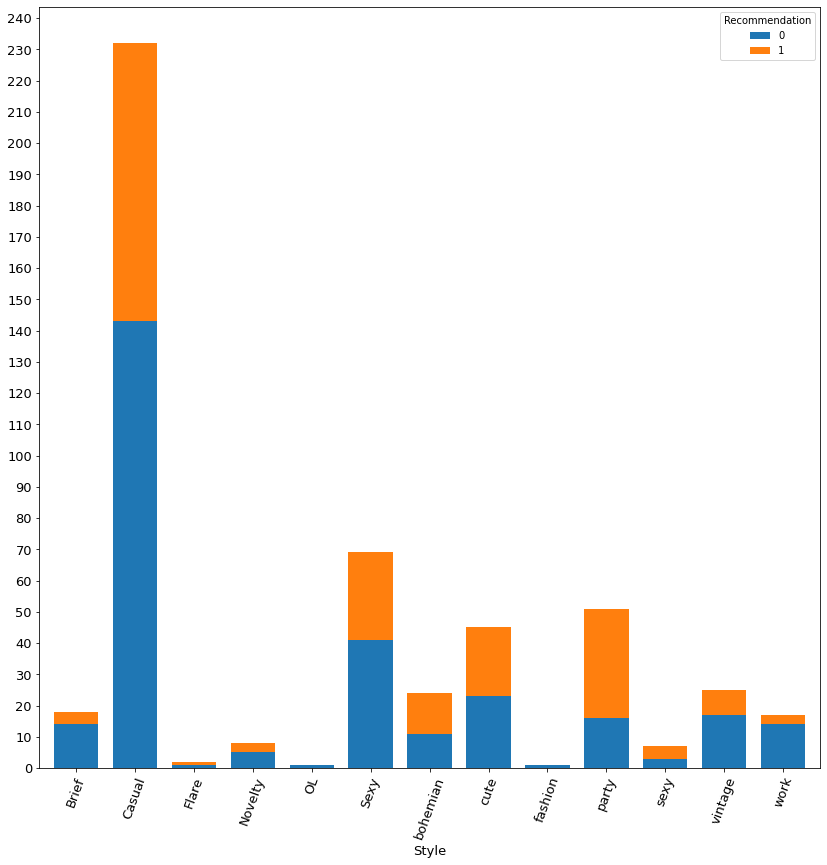

In [53]:
clothes.groupby(['Style'])['Recommendation'].value_counts().unstack().plot.bar(rot=70, width=0.75, 
                                                                            stacked=True, figsize=(14,14),
                                                                            fontsize=13,
                                                                            yticks=list(range(0,250,10)))
plt.xlabel("Style", fontsize=13)

Text(0.5, 0, 'Price')

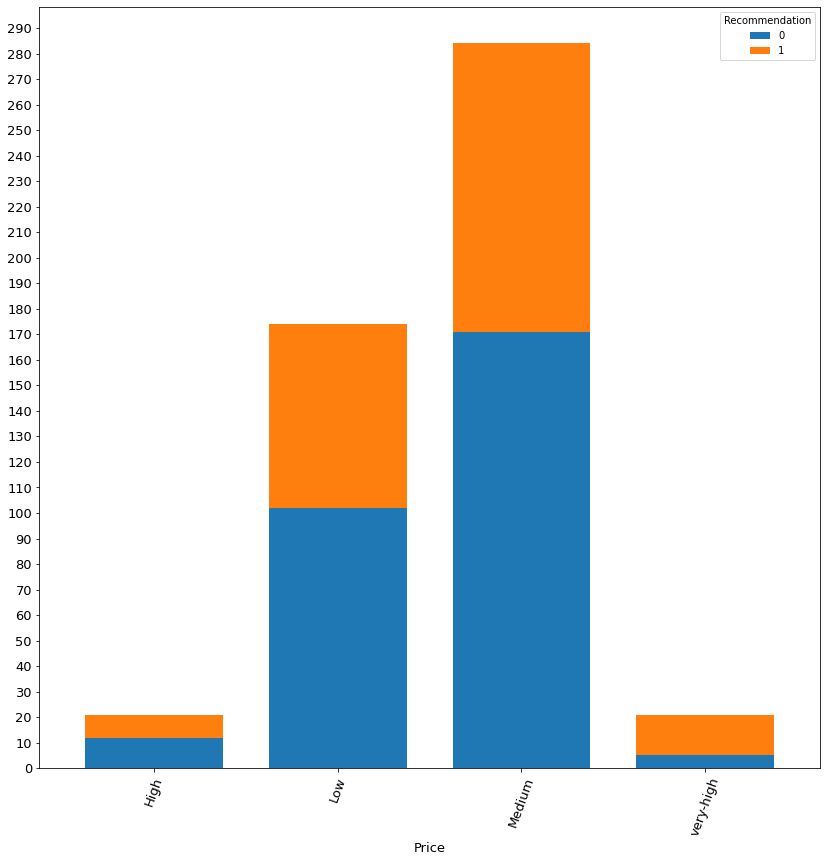

In [54]:
# Change order !!!
clothes.groupby(['Price'])['Recommendation'].value_counts().unstack().plot.bar(rot=70, width=0.75, 
                                                                            stacked=True, figsize=(14,14),
                                                                            fontsize=13, yticks=list(range(0,300,10)))
plt.xlabel("Price", fontsize=13)

<AxesSubplot:>

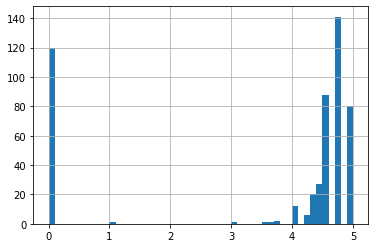

In [55]:
# histogram of ratings
clothes['Rating'].hist(bins=50)

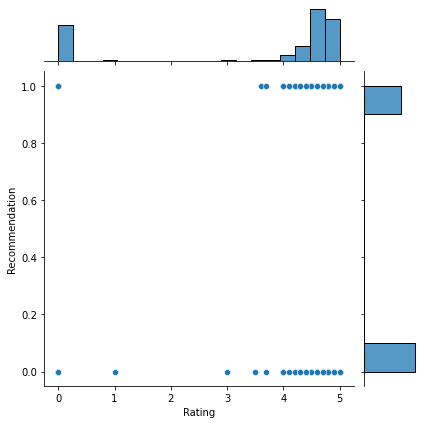

In [59]:
sns.jointplot(x="Rating", y="Recommendation", data=clothes);

/Users/matheson/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/matheson/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/matheson/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 37.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/matheson/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


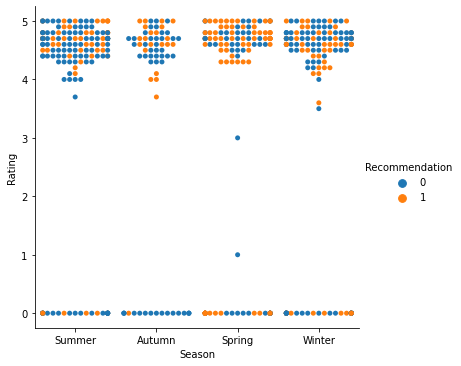

In [62]:
sns.catplot(y="Rating", x="Season", hue="Recommendation", kind="swarm", data=clothes)

/Users/matheson/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/matheson/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/matheson/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/matheson/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


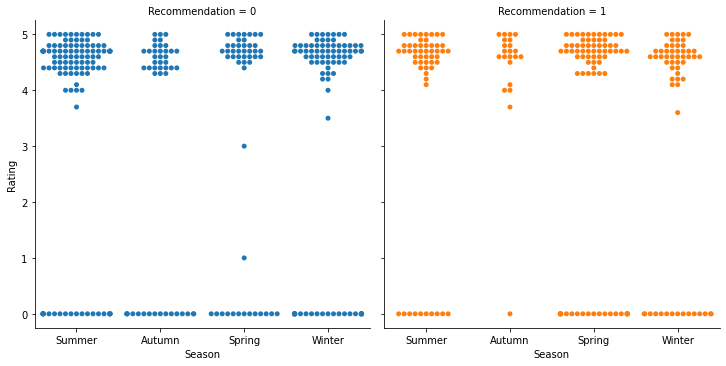

In [76]:
sns.catplot(x="Season", y="Rating", hue='Recommendation',
            col="Recommendation",
            kind="swarm", data=clothes)

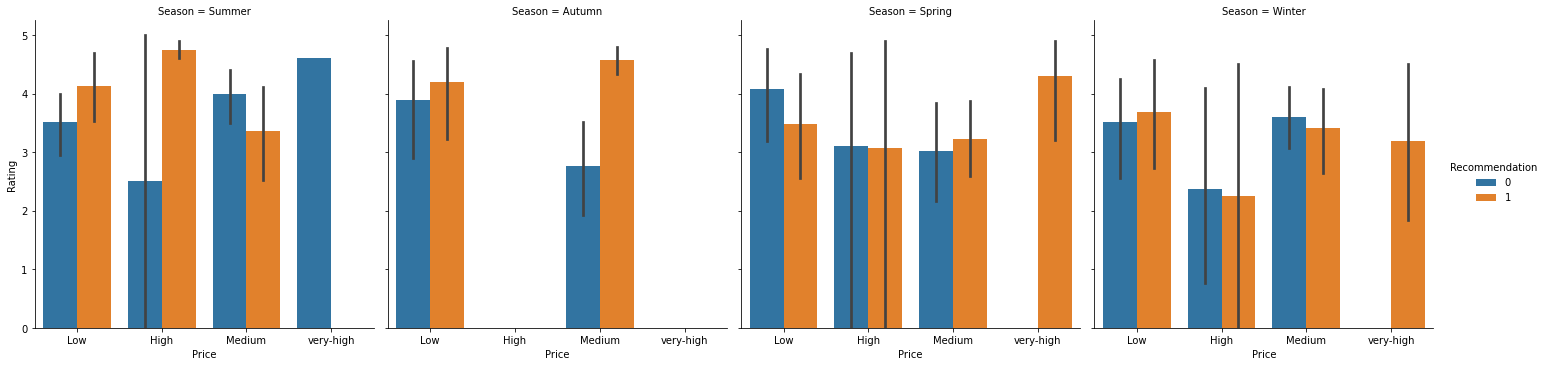

In [68]:
sns.catplot(x="Price", y="Rating", hue="Recommendation", col='Season', kind="bar", data=clothes)

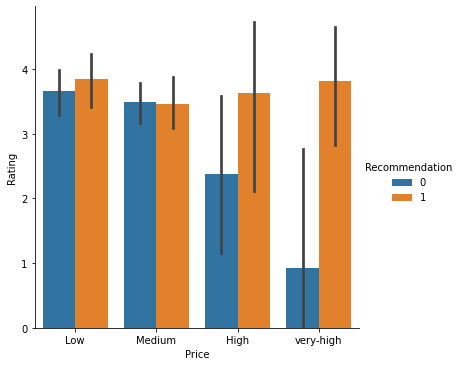

In [72]:
sns.catplot(x="Price", y="Rating", hue="Recommendation", order=['Low', 'Medium', 'High', "very-high"], kind="bar", data=clothes);

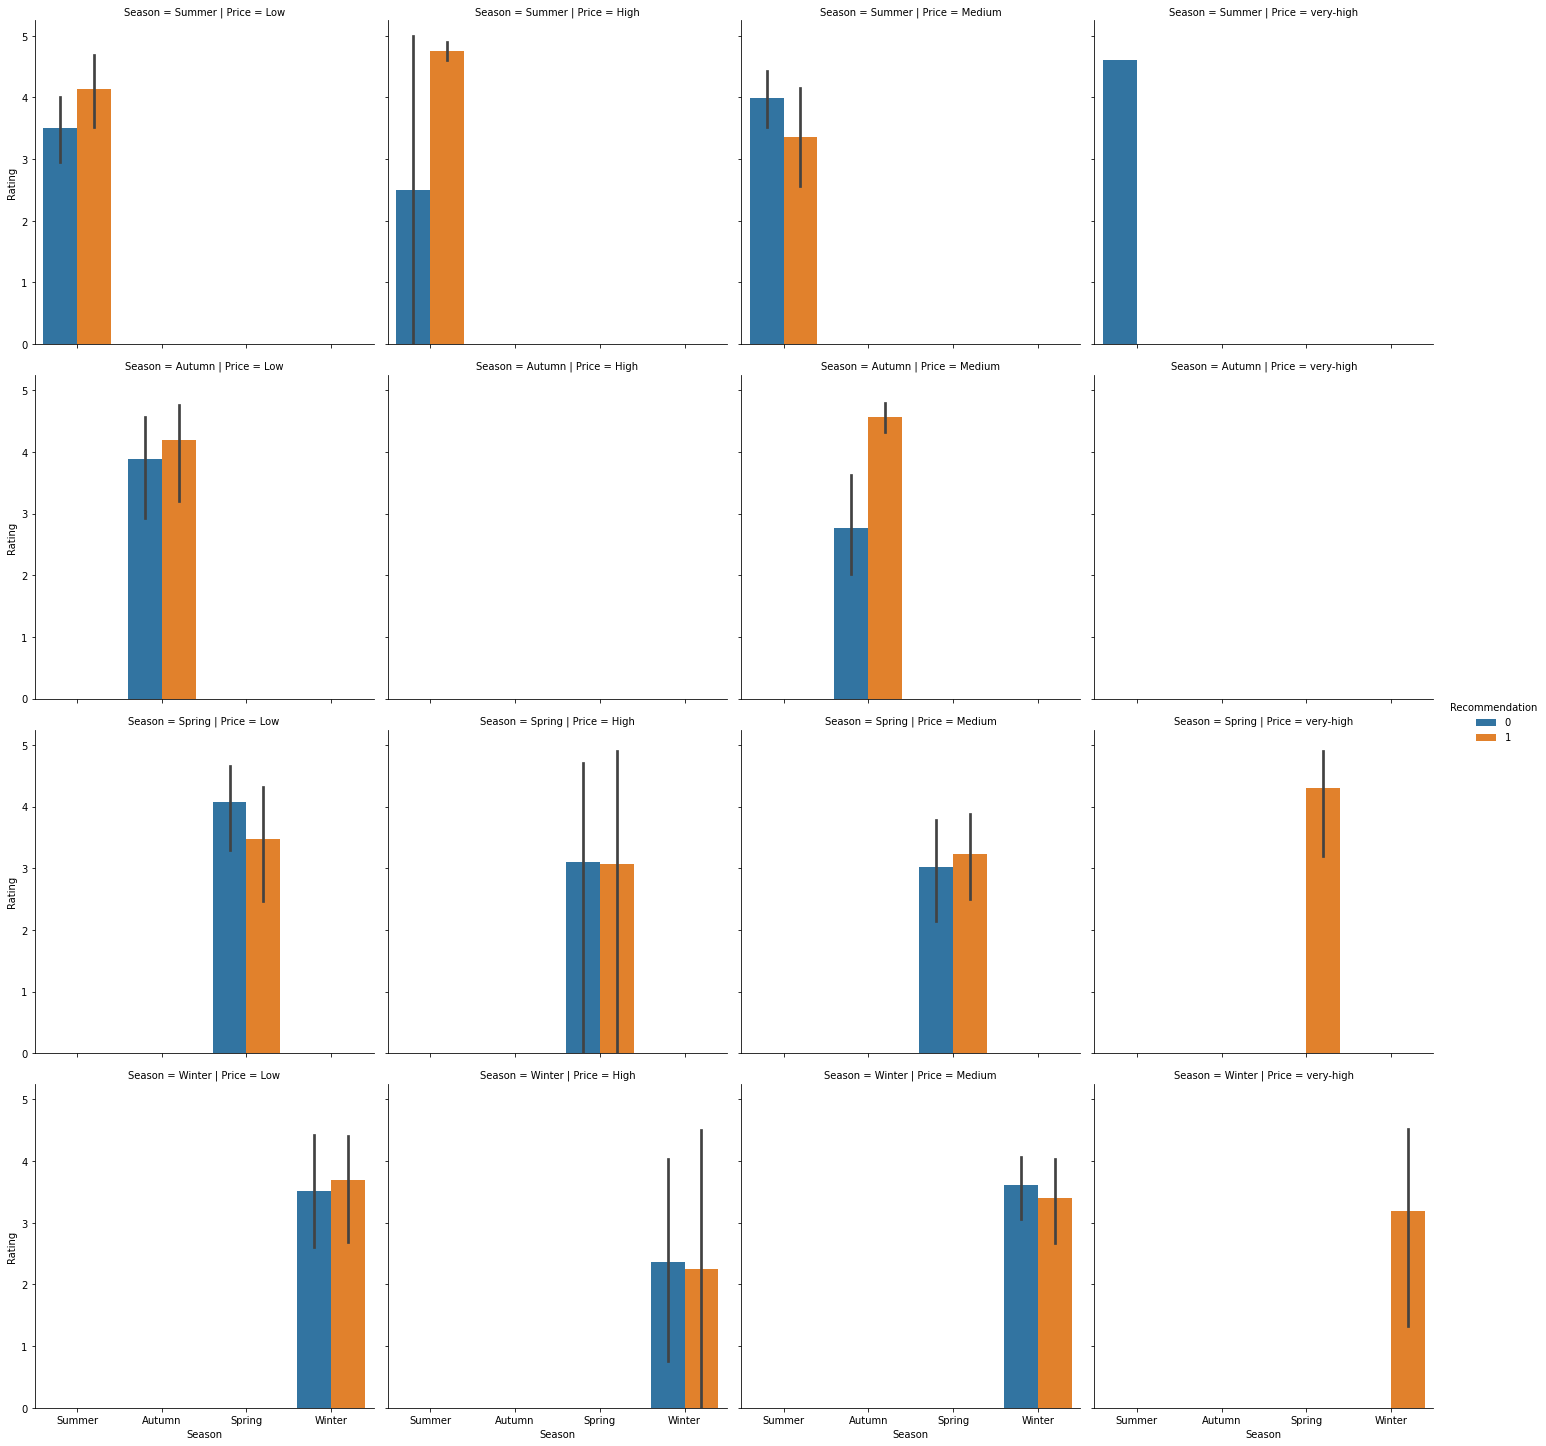

In [81]:

sns.catplot(x="Season", y="Rating", hue="Recommendation", row='Season', col='Price', kind="bar", data=clothes);

#order=['Spring', 'Summer', 'Autumn', "Winter"]


In [ ]:
clothes.groupby(['Rating'])['Recommendation'].value_counts().unstack().plot.bar(rot=70, width=0.75, 
                                                                            stacked=True, figsize=(14,14),
                                                                            fontsize=13,yticks=list(range(0,130,10)),
                                                                            )
plt.xlabel("Rating", fontsize=13)


In [ ]:
order = ["S", "M", "L", "XL", 'free']
#     CHANGE    ORDER 
clothes.groupby(['Size'])['Recommendation'].value_counts().unstack().plot.bar(rot=70, width=0.75, 
                                                                            stacked=True, figsize=(14,14),
                                                                            fontsize=13, yticks=list(range(0,190,10)) )

plt.xlabel("Size", fontsize=13)


In [ ]:
# ORDER !!!
clothes.groupby(['Season'])['Recommendation'].value_counts().unstack().plot.bar(rot=70, width=0.75, 
                                                                            stacked=True, figsize=(14,14),
                                                                            fontsize=13, yticks=list(range(0,180,10)) )
plt.xlabel("Season", fontsize=15)


In [ ]:
clothes.groupby(['NeckLine'])['Recommendation'].value_counts().unstack().plot.bar(rot=70, width=0.75, 
                                                                            stacked=True, figsize=(14,14),
                                                                            fontsize=13, yticks=list(range(0,290,10)) )
plt.xlabel("Neckline", fontsize=13)


In [ ]:
clothes.groupby(['SleeveLength'])['Recommendation'].value_counts().unstack().plot.bar(rot=70, width=0.75, 
                                                                            stacked=True, figsize=(14,14),
                                                                              fontsize=13, yticks=list(range(0,250,10))
                                                                                     
plt.xlabel("Sleeve Length", fontsize=13))

In [ ]:
clothes.groupby(['Waistline'])['Recommendation'].value_counts().unstack().plot.bar(rot=70, width=0.75, 
                                                                            stacked=True, figsize=(14,14),
                                                                            fontsize=13, yticks=list(range(0,420,10)) )
plt.xlabel("Waistline", fontsize=13)



In [ ]:
clothes.groupby(['Material'])['Recommendation'].value_counts().unstack().plot.bar(rot=70, width=0.75, 
                                                                            stacked=True, figsize=(14,14),
                                                                            fontsize=13, yticks=list(range(0,160,10)) )
plt.xlabel("Material", fontsize=13)

In [ ]:
clothes.groupby(['FabricType'])['Recommendation'].value_counts().unstack().plot.bar(rot=70, width=0.75, 
                                                                            stacked=True, figsize=(14,14),
                                                                            fontsize=13, yticks=list(range(0,420,10)),fontsize=13,grid=True)
plt.xlabel("Type of Fabric", fontsize=13)

In [ ]:
clothes.groupby(['Decoration'])['Recommendation'].value_counts().unstack().plot.bar(rot=70, width=0.75, 
                                                                            stacked=True, figsize=(14,14),
                                                                            fontsize=13, yticks=list(range(0,250,5)),fontsize=13,grid=False)
plt.xlabel("Decoration", fontsize=13)

In [ ]:
clothes.groupby(['PatternType'])['Recommendation'].value_counts().unstack().plot.bar(rot=70, width=0.75, 
                                                                            stacked=True, figsize=(14,14),
                                                                            yticks=list(range(0,320,10)),
                                                                            fontsize=15,grid=False,
                                                                            title=" ")
plt.xlabel("Pattern", fontsize=15)

In [ ]:
## #clothes.FabricType.value_counts().plot(kind="bar", rot=50, stacked=True, color=clothes.Recommendation)
#get recommended or not in 2 colors


FTseries = clothes[['FabricType', 'Recommendation']].value_counts()


print(FTseries.index[0])

#FTseries.plot(kind='bar', stacked=True, color={'0': 'green', '1': 'pink'} )

#print(FTseries.values)
#df = pd.DataFrame( { "Count": list(FTseries.values[0]), "Recommendation" }, index = list(FTseries.index))
                                                         # index 2 rec                           index 1 (fab type)


#dataframe = pd.DataFrame({'Age':[23, 17, 40, 38, 24, 12, 45], 
#                          'Avg Age in Family':[70, 65, 80, 55, 60, 63, 90]}, 
#                          index =['Olivia', 'John', 'Laura', 'Ben', 'Kevin',                                                'Robin','Elsa'])
#axis = df.plot.bar(rot=0, color=['r', 'b'])
#print(axis)
#plt.show()


In [ ]:
clothes.Price.value_counts().plot(kind='pie', rot=0, title="Price", autopct='%1.1f%%')





In [ ]:
clothes.Size.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [ ]:
sns.catplot(x="Recommendation", y="Rating", hue="Size",
            col="Season",
            kind="swarm", data=clothes);

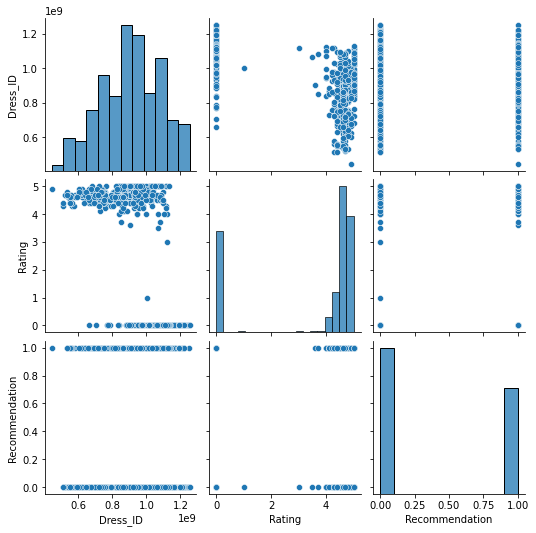

In [60]:
sns.pairplot(clothes)

In [ ]:
sns.set()
sns.pairplot(clothes, hue='Recommendation') # tips is df

In [ ]:
sns.heatmap(clothes.corr(), cmap='coolwarm')
plt.show() # only numeric values

## Further Analysis


In [ ]:
# mean rating of dresses in each kind of ____season/price/neckline
# alskdfj =  group by

# a;slfkj .agg([ ])

table1 = pd.pivot_table(clothes, values='Rating', index=['Season', 'Style'],
                    columns=['Price'] , aggfunc='mean')

table1

# crosstab ?
# pivot table ?


In [ ]:

pd.crosstab(clothes.Season, clothes.Recommendation)

In [ ]:
clothes.groupby(['Recommendation', 'Season'])[['Rating']].mean().unstack()

## Machine Learning

### Predict Recommendation

In [ ]:
clothes.isnull().sum()

In [ ]:
from sklearn import svm, tree, neural_network
from sklearn import model_selection as mod_sel

from keras.utils import to_categorical

from sklearn.metrics import confusion_matrix

In [ ]:
y = clothes["Recommendation"]

y.shape

X = clothes[["Style", "Price", "Rating", "Size", "Season", "NeckLine", "SleeveLength",
        "Waistline", "Material", "FabricType", "Decoration", "PatternType"]]

X = pd.get_dummies(X, columns = ["Style", "Price", "Size", "Season", "NeckLine", "SleeveLength",
        "Waistline", "Material", "FabricType", "Decoration", "PatternType"])

Xtrain, Xtest, ytrain, ytest = mod_sel.train_test_split(X, y, test_size=0.3)

#Xtrain = Xtrain.reshape(1,-1)
#Xtest = Xtest.reshape(1,-1)

#### Support Vector Machine Classifier (SVM)

In [ ]:
SVM = svm.SVC()
SVM.fit(Xtrain, ytrain)

svm_preds = SVM.predict(Xtest)

sum(svm_preds == ytest)/len(ytest)

cm1_svm = confusion_matrix(svm_preds, ytest)

plt.matshow(cm1_svm)#, cmap=plt.cm.gray_r)
plt.colorbar()

In [ ]:
#import statsmodels.api as sm

#df['fem_marr'] = df['female'] * df['married']  # became  important feature


#X2 = sm.add_constant(X)  # Add column of 1s
#results2 = sm.OLS(y,X2).fit()
#print(results2.summary())

#### Decision Tree Classifier

In [ ]:
 # do get_dummies


for samples in range(1,52,5):

    print("tree depth:", depth, "samples:", samples)
    Tree = tree.DecisionTreeClassifier(max_depth=depth, min_samples_leaf=samples)


    Tree.fit(Xtrain, ytrain)

    preds = Tree.predict(Xtest)

    right = sum(preds==ytest)
    acc = right/len(ytest)
    print("accuracy:", acc)

    


#### Neural Network

In [ ]:
# categorical needs to be numbers ( so just do get_dummies!)

y_train = to_categorical(ytrain)
y_test = to_categorical(ytest)


clf = neural_network.MLPClassifier(solver='lbfgs', alpha=1e-5,    
                    hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(Xtrain, y_train)

score = clf.score(Xtest, y_test)
print(score)


### Predict Price

In [ ]:
y = clothes["Price"]

X = clothes[["Style", "Rating", "Size", "Season", "NeckLine", "SleeveLength",
        "Waistline", "Material", "FabricType", "Decoration", "PatternType", "Recommendation"]]

X = pd.get_dummies(X, columns = ["Style", "Size", "Season", "NeckLine", "SleeveLength",
        "Waistline", "Material", "FabricType", "Decoration", "PatternType"])

Xtrain, Xtest, ytrain, ytest = mod_sel.train_test_split(X, y, test_size=0.3)




#pd.get_dummies(titanic, columns=['sex', 'who'], drop_first=True)

In [ ]:
SVM = svm.SVC()    # can this handle mult categories ???
SVM.fit(Xtrain, ytrain)
svm_preds = SVM.predict(Xtest)
sum(svm_preds == ytest)/len(ytest)

In [ ]:
Tree = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=21)

Tree.fit(Xtrain, ytrain)

preds = Tree.predict(Xtest)

# or   Tree.score(Xtest, ytest)


right = sum(preds==ytest)
acc = right/len(ytest)
print("accuracy:", acc)


confusion_matrix(preds, ytest)


In [ ]:

y_train = to_categorical(ytrain)
y_test = to_categorical(ytest)


clf = neural_network.MLPClassifier(solver='lbfgs', alpha=1e-5,    
                    hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(Xtrain, y_train)

score = clf.score(Xtest, y_test)
print(score)